# Data Preprocessing

In [1]:
import pandas as pd #package for manipulating dataframe
import numpy as np #package for array operation
import seaborn as sns  #package for plotting graphs
import matplotlib.pyplot as plt 
from tqdm import tqdm   # Add progress bar to show progress of code execution

df = pd.read_csv("weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date']) #Define the Date Column to be datatime column

#magic line for visualizing the plot in jupyter
%matplotlib inline

pd.set_option('display.max_columns', None)

## Analyzing Data Loss 

### Analyzing data by date

In [2]:
#Make a array that contains all date, starting from the min to the max in the dataframe
full_idx = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="1D")
full_idx

DatetimeIndex(['2007-11-01', '2007-11-02', '2007-11-03', '2007-11-04',
               '2007-11-05', '2007-11-06', '2007-11-07', '2007-11-08',
               '2007-11-09', '2007-11-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', length=3525, freq='D')

In [3]:
import time #Time Package for time calculations
#Create an empty dataframe with index representing all dates, and columns are the locations
miss = pd.DataFrame(index=full_idx, columns = list(df.Location.unique())) 

#Make a list of indexes from the full_idx, which is converted from datetimeindex (20107-11-01) to timestamp (1193846400)
tlist = []
for i in full_idx:
    timestamp = time.mktime(i.timetuple()) #Coverting from datetime to timestamp
    t = (timestamp-1193846400)/86400 #Calculating the indexes from timestamp --> i.e. the day after the min date
    tlist.append(t)

#Another Loop here. Find the date that are not exist in the data of that location
for j in tqdm(list(df.Location.unique())):
    alist = []
    #Comparing full_idx and df[df["Location"]== j].Date (df_column objects) by .difference() method --> give a list on non-match
    for k in list(full_idx.difference(df[df["Location"]== j].Date)): 
        timestamp = time.mktime(k.timetuple())
        a = (timestamp-1193846400)/86400
        alist.append(a) #alist finally contains all the non-match date

    #For every date in tlist, if that date is in alist --> Nan (non-match), 1 (matched)
    rlist = []
    for m in tlist:
        rlist.append(np.nan if m in alist else 1) 
        
    miss[j] = rlist #Save the rlist the miss[j] column, then loop again
miss.to_csv("MissingDate.csv")

100%|██████████| 49/49 [00:01<00:00, 26.87it/s]


(3525, 4900)


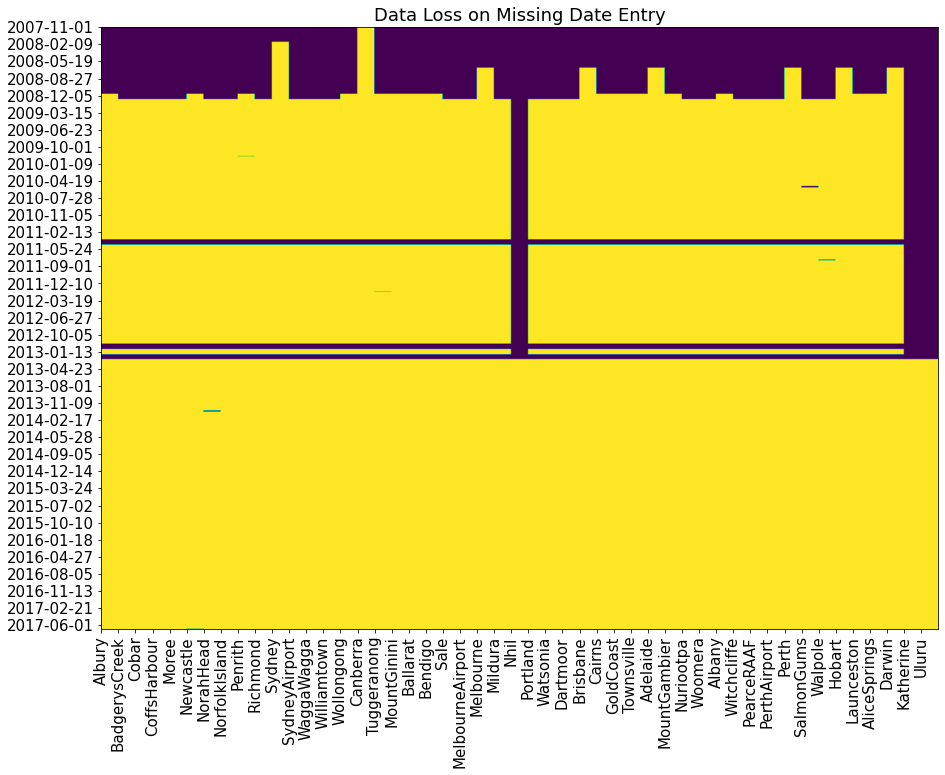

In [4]:
gg = miss.copy().fillna(0).to_numpy() #Fill all Nan by 0, then covert the whole dataframe to numpy array
gg = np.repeat(gg, 100, axis=1) #Expand the column in numpy array by repeating it 100 times
print(gg.shape) #Get a shape of (3525 row, 49 location x 100 columns) array with binary values

from matplotlib.ticker import MultipleLocator
fig = plt.figure(figsize = (15,15)) #Add a plt figure
ax1 = fig.add_subplot(111)
ax1.imshow(gg,cmap='viridis') # Show the numpy array as an image, showing binary value by viridis colormap 

ax1.set_xticks(np.arange(0, gg.shape[1], 100))
ax1.set_yticks(np.arange(0, gg.shape[0], 100))

ax1.set_xticklabels(list(df.Location.unique())) #Set xtick label be the location list

import datetime
#Create a list of datetime back for y-tick lable
lista = []
for i in np.array(np.arange(0,3600,100))*86400+1193846400: # 3525 row ~3600, label per 100 rows follow the same equation above
    lista.append(datetime.datetime.fromtimestamp(i).date()) #Convert timestamp to datetime
ax1.set_yticklabels(lista)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title("Data Loss on Missing Date Entry", fontsize = 18)
plt.show()
fig.savefig("MissingTime.png")

### Dropping entries before 2009-01-1

In [5]:
#Delete Entry before 2009-01-01, since all locations would have data after this date
df = df[~(df['Date'] < '2009-01-01')]
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
31     2009-01-01   Albury     11.3     26.5       0.0          NaN       NaN   
32     2009-01-02   Albury      9.6     23.9       0.0          NaN       NaN   
33     2009-01-03   Albury     10.5     28.8       0.0          NaN       NaN   
34     2009-01-04   Albury     12.3     34.6       0.0          NaN       NaN   
35     2009-01-05   Albury     12.9     35.8       0.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455 2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
145456 2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
145457 2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
145458 2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
145459 2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
31             WNW           56.0          W        WNW          19.0   
32               W           41.0        WSW        SSW          19.0   
33             SSE           26.0        SSE          E          11.0   
34             WNW           37.0        SSE         NW           6.0   
35             WNW           41.0        ENE         NW           6.0   
...            ...            ...        ...        ...           ...   
145455           E           31.0         SE        ENE          13.0   
145456         NNW           22.0         SE          N          13.0   
145457           N           37.0         SE        WNW           9.0   
145458          SE           28.0        SSE          N          13.0   
145459         NaN            NaN        ESE        ESE          17.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
31              31.0         46.0         26.0       1004.5       1003.2   
32              11.0         44.0         22.0       1014.4       1013.1   
33               7.0         43.0         22.0       1018.7       1014.8   
34              17.0         41.0         12.0       1015.1       1010.3   
35              26.0         41.0          9.0       1012.6       1009.2   
...              ...          ...          ...          ...          ...   
145455          11.0         51.0         24.0       1024.6       1020.3   
145456           9.0         56.0         21.0       1023.5       1019.1   
145457           9.0         53.0         24.0       1021.0       1016.8   
145458           7.0         51.0         24.0       1019.4       1016.5   
145459          17.0         62.0         36.0       1020.2       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
31           NaN       NaN     19.7     25.7        No           No  
32           NaN       NaN     14.9     22.1        No           No  
33           NaN       NaN     17.1     26.5        No           No  
34           NaN       NaN     20.7     33.9        No           No  
35           NaN       NaN     22.4     34.4        No           No  
...          ...       ...      ...      ...       ...          ...  
145455       NaN       NaN     10.1     22.4        No           No  
145456       NaN       NaN     10.9     24.5        No           No  
145457       NaN       NaN     12.5     26.1        No           No  
145458       3.0       2.0     15.1     26.0        No           No  
145459       8.0       8.0     15.0     20.9        No          NaN  

[143129 rows x 23 columns]

### Visualize data loss in form of heatmap

In [6]:
# See the missing value in each location
location_list = [i for i in df.Location.unique()] #Form a list for unique location value in dataframe
Info = df.count().to_frame().transpose() # Get the counts for valid entries for each column --> Show the total 
                                        # As the resulted dataframe is like n row x 1 column, so I transpose the dataframe.
Info

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  143129    143129   141655   141876    139893        80678     73617   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0       133256         133318      132655      138924        141392   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0        140086       140500       138645       128159       128195     87620   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0     84160   141381   139536     139893        139886

In [7]:
for k in location_list:
    globals()[f'df_{k}'] = df.groupby(['Location']).get_group(k) # define dataframe by location, e.g. df_Albury
    data = globals()[f'df_{k}'].count().to_frame().transpose() #Same operation in row 2, return valid counts in each column
                                                            # but the frame we get is from data in one specific location
    Info = Info.append(data) # Append the counts dataframe in each iteration

Info.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  143129    143129   141655   141876    139893        80678     73617   
0    3009      3009     2998     2998      2981            0         0   
0    3009      3009     2973     2980      2928            0         0   
0    3009      3009     3003     3006      2988         2666       550   
0    3009      3009     2994     2990      2953         1785      1494   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0       133256         133318      132655      138924        141392   
0         2978           2978        2486        2963          3001   
0         2933           2933        2574        2924          2960   
0         2967           2967        2982        2994          2992   
0         2650           2650        2662        2706          2713   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0        140086       140500       138645       128159       128195     87620   
0          2998         3000         3001         3004         3001      1278   
0          2961         2955         2954         2841         2836         0   
0          2997         2884         2884         2979         2983      2629   
0          2714         2990         2987         2698         2697      2196   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0     84160   141381   139536     139893        139886  
0      1415     3000     3001       2981          2981  
0         0     2968     2965       2928          2928  
0      2701     3001     3002       2988          2988  
0      2231     2994     2995       2953          2953

In [8]:
location_list.insert(0, "Total")
Info['Name'] = location_list
row_info = pd.DataFrame(df.dtypes).transpose()
Info = pd.concat([row_info, Info], ignore_index=True)
Info = Info.set_index('Name')
Info = Info[2:].astype(str).astype(int)

In [9]:
Info.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
Name                                                                     
Albury         3009      3009     2998     2998      2981            0   
BadgerysCreek  3009      3009     2973     2980      2928            0   
Cobar          3009      3009     3003     3006      2988         2666   
CoffsHarbour   3009      3009     2994     2990      2953         1785   
Moree          3009      3009     3007     3009      2854         2292   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Name                                                                          
Albury                0         2978           2978        2486        2963   
BadgerysCreek         0         2933           2933        2574        2924   
Cobar               550         2967           2967        2982        2994   
CoffsHarbour       1494         2650           2650        2662        2706   
Moree              2055         2931           2932        2901        2954   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Name                                                                  
Albury                 3001          2998         3000         3001   
BadgerysCreek          2960          2961         2955         2954   
Cobar                  2992          2997         2884         2884   
CoffsHarbour           2713          2714         2990         2987   
Moree                  2968          2968         3005         3004   

               Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
Name                                                                            
Albury                3004         3001      1278      1415     3000     3001   
BadgerysCreek         2841         2836         0         0     2968     2965   
Cobar                 2979         2983      2629      2701     3001     3002   
CoffsHarbour          2698         2697      2196      2231     2994     2995   
Moree                 3009         3008      2471      2605     3009     3009   

               RainToday  RainTomorrow  
Name                                    
Albury              2981          2981  
BadgerysCreek       2928          2928  
Cobar               2988          2988  
CoffsHarbour        2953          2953  
Moree               2854          2854

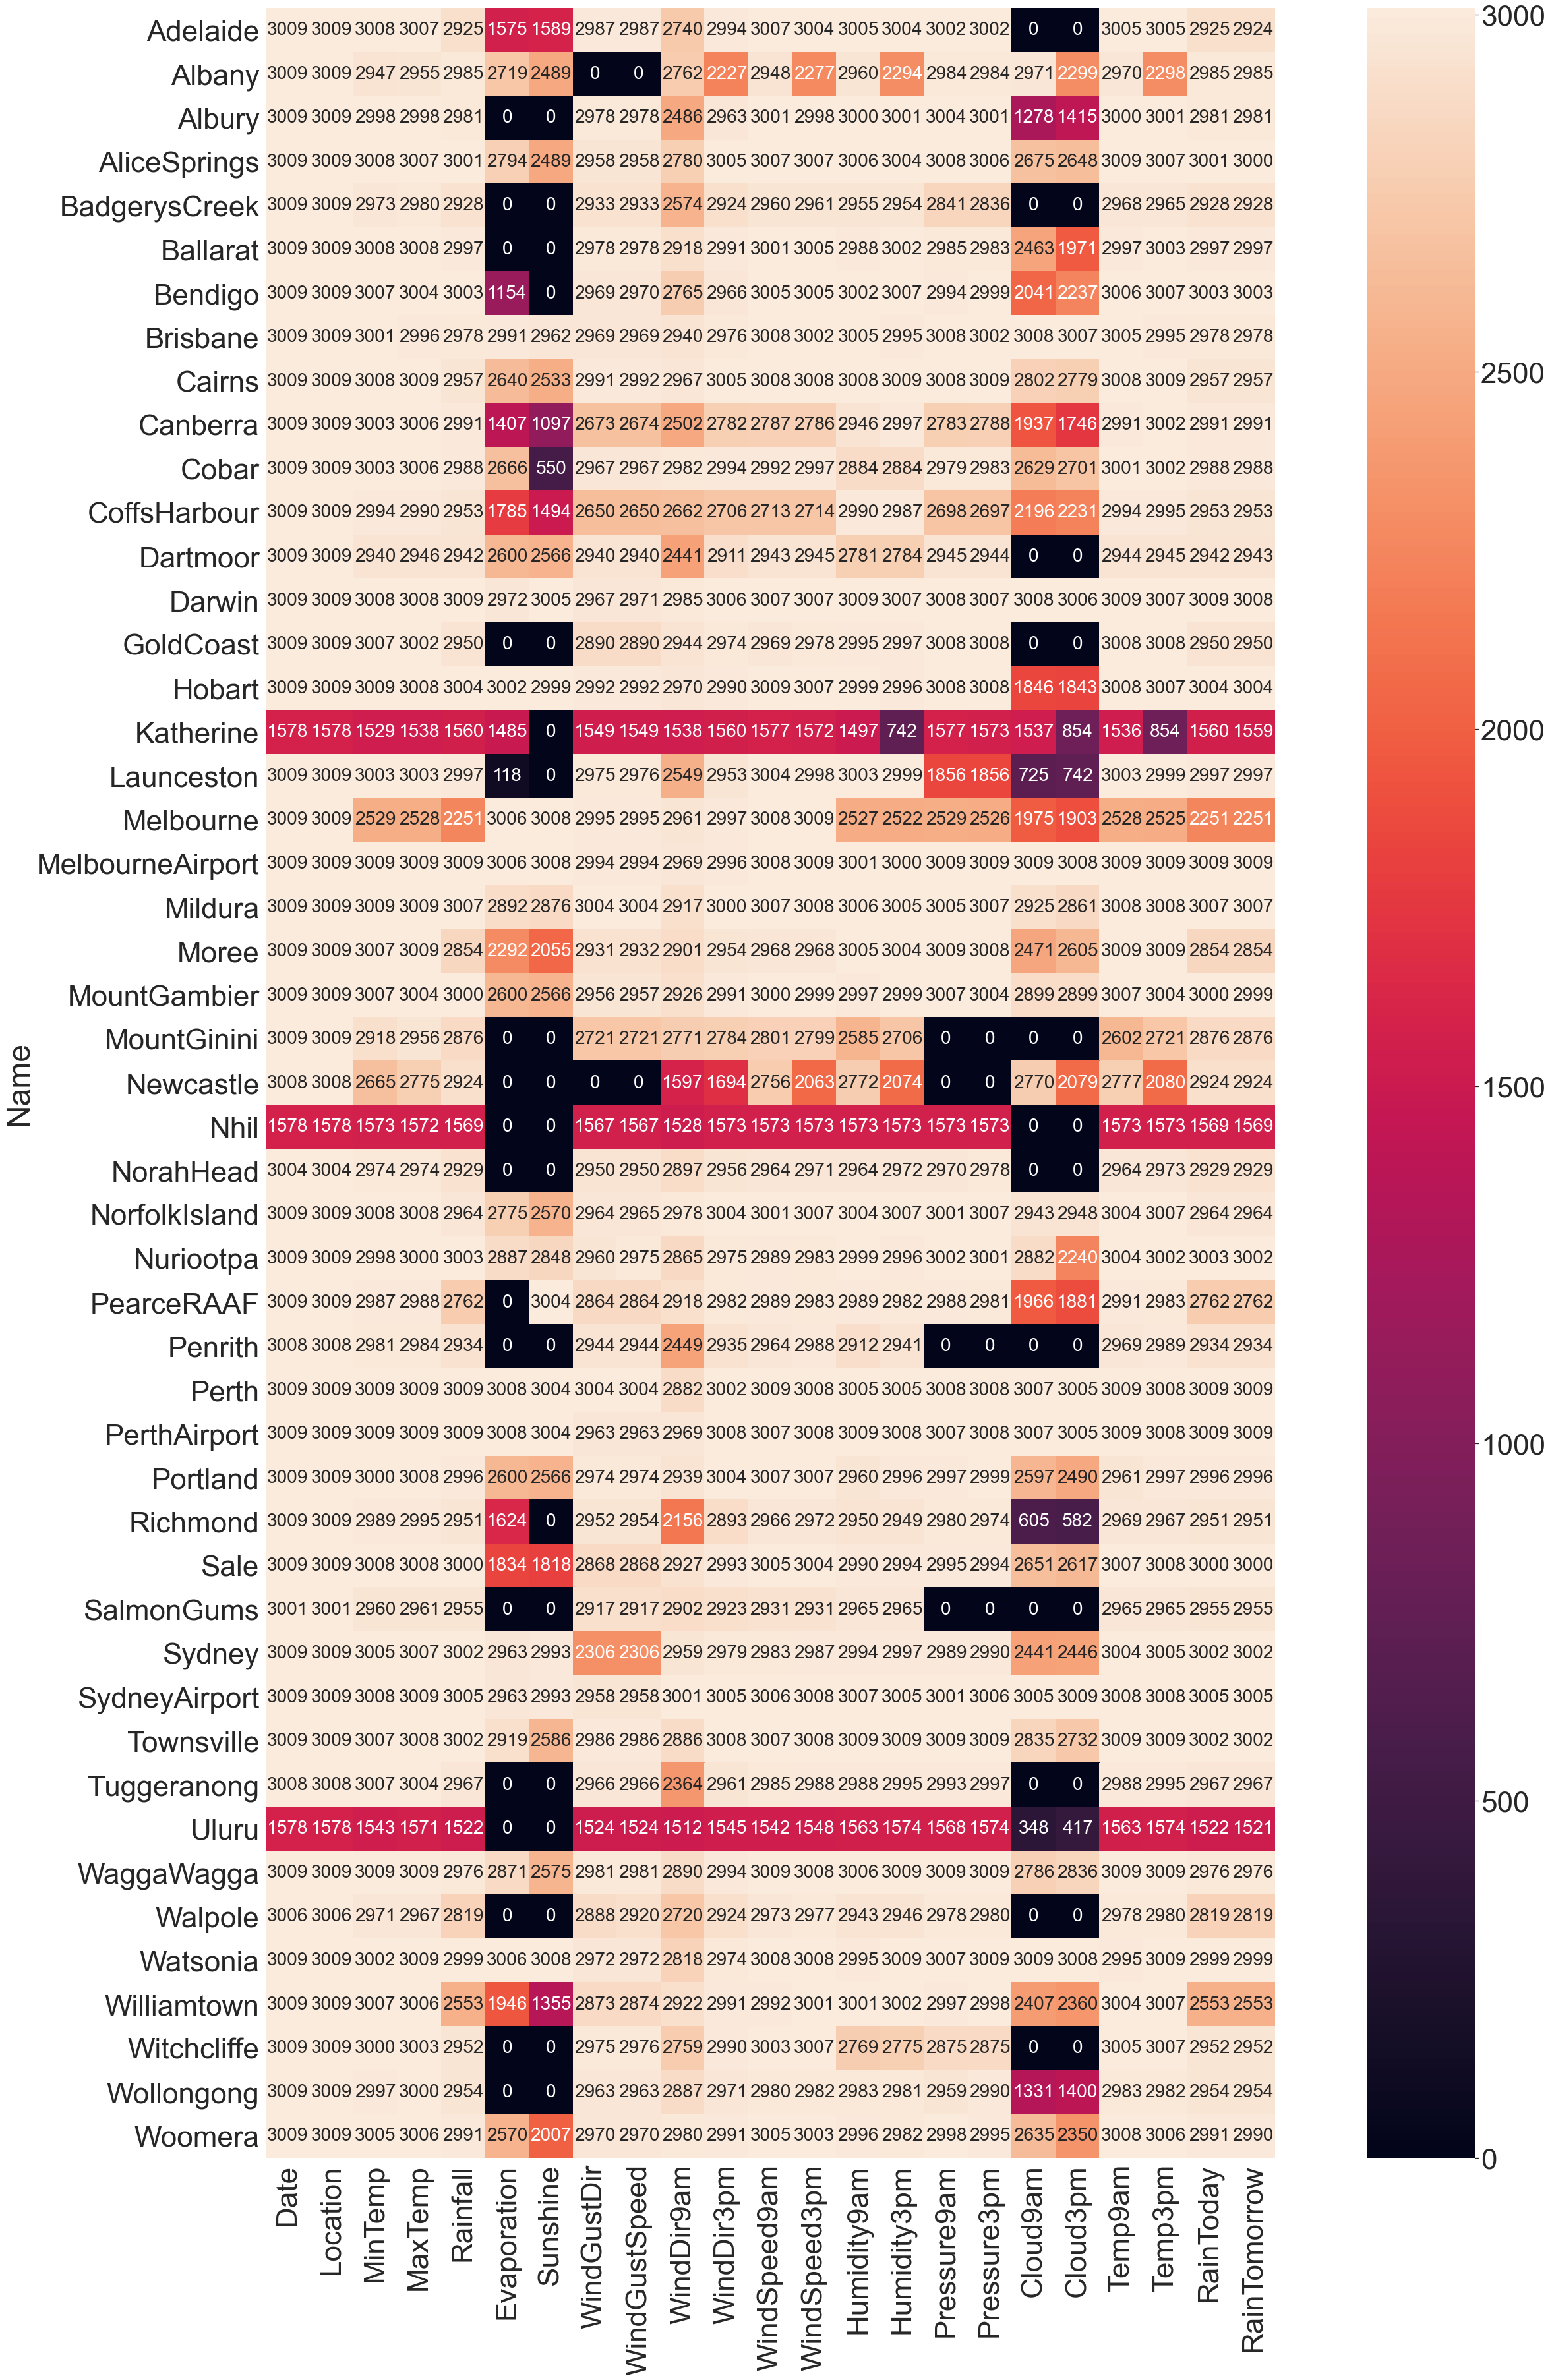

In [10]:
# Data Loss Matrix
# We can see some columns are having 0 vvalid entries on specific location.
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(50,60)) 
Info = Info.sort_index()
ax = sns.heatmap(Info, annot=True,fmt='d',annot_kws={"size": 28},square=True)

In [11]:
# We now put the code in the above into a function. We can now call this function whenever we wish to generate a data loss heatmap
def visualize_data_loss(data):
    location_list = [i for i in data.Location.unique()]
    Info = data.count().to_frame().transpose()
    for k in tqdm(location_list):
        globals()[f'data_{k}'] = data.groupby(['Location']).get_group(k) # define dataframe by location, e.g. df_Albury
        data1 = globals()[f'data_{k}'].count().to_frame().transpose()
        Info = Info.append(data1)

    location_list.insert(0, "Total")
    Info['Name'] = location_list
    row_info = pd.DataFrame(data.dtypes).transpose()
    Info = pd.concat([row_info, Info], ignore_index=True)
    Info = Info.set_index('Name')
    Info = Info[2:].astype(str).astype(int)

    sns.set(font_scale=4)
    fig, ax = plt.subplots(figsize=(50,60)) 
    Info = Info.sort_index()
    ax = sns.heatmap(Info, annot=True,fmt='d',annot_kws={"size": 28},square=True)

## Fill missing data by mean/mode

A simple method is to fill all missing data using mean (for numerical features) or mode (for categorical features)

In [12]:
cols_with_null = df.columns[df.isna().any()]
cols_with_null

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
cols_fill_with_mean = []
cols_fill_with_mode = []

for col in cols_with_null:
    if (str(df.dtypes[col]) == "float64"):  # Numerical feature -> Fill with mean
        cols_fill_with_mean.append(col)
    else:   # Categorical feature -> Fill with mode
        cols_fill_with_mode.append(col)

In [14]:
data = df.copy()    # Create a copy of the dataframe called `data`

In [15]:
for col in cols_fill_with_mean:
    data[col].fillna(data[col].mean(), inplace=True)

for col in cols_fill_with_mode:
    data[col].fillna(data[col].mode()[0], inplace=True)

100%|██████████| 49/49 [00:00<00:00, 53.05it/s]


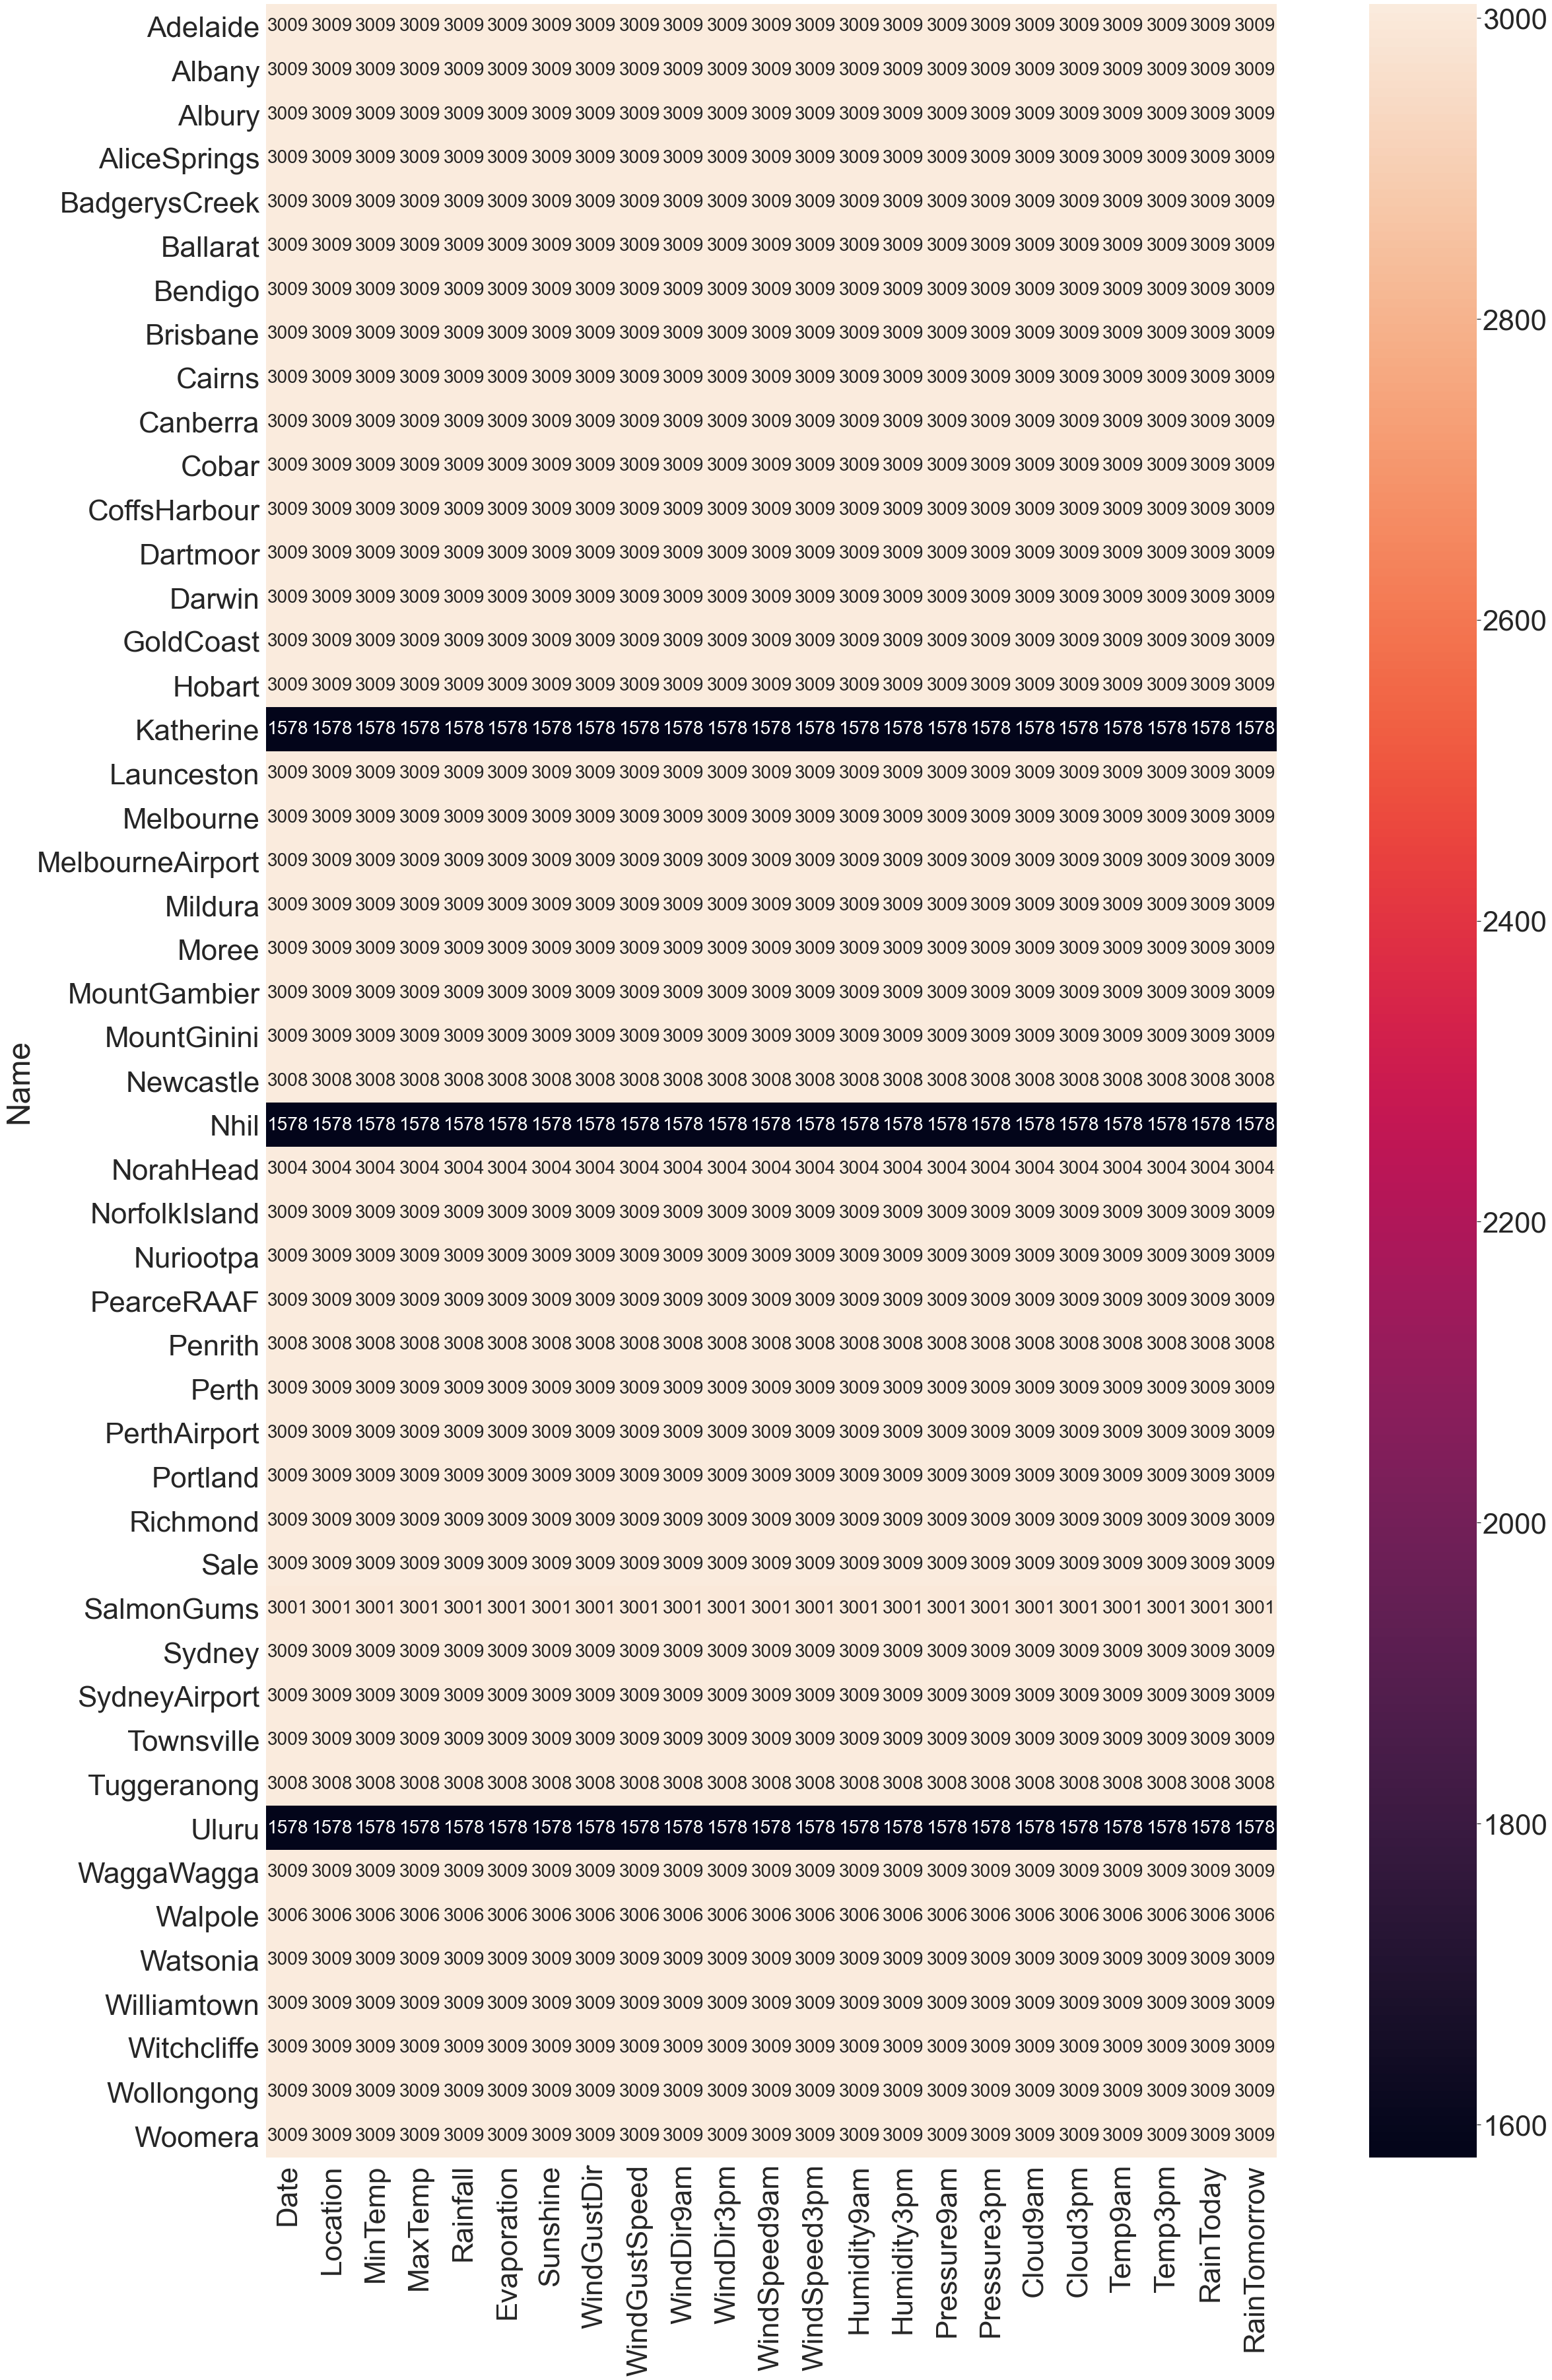

In [16]:
visualize_data_loss(data)

Now, we have finished filling in all null values, because the non-null value count for every location is the same across all features. Note that "Katherine" and "Nhil" have much less rows than other locations. However, these locations don't have any null values in any columns

## Normalization using min-max

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Numerical features
data.dtypes[data.dtypes == np.float64]

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
dtype: object

In [19]:
cols_to_normalize = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]

In [20]:
minmax_scaler = MinMaxScaler()

for col in tqdm(cols_to_normalize):
    data[col] = minmax_scaler.fit_transform(data[[col]])

data.head()

100%|██████████| 16/16 [00:00<00:00, 145.46it/s]


Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
31 2009-01-01   Albury  0.466981  0.591682       0.0     0.037761  0.524557   
32 2009-01-02   Albury  0.426887  0.542533       0.0     0.037761  0.524557   
33 2009-01-03   Albury  0.448113  0.635161       0.0     0.037761  0.524557   
34 2009-01-04   Albury  0.490566  0.744802       0.0     0.037761  0.524557   
35 2009-01-05   Albury  0.504717  0.767486       0.0     0.037761  0.524557   

   WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
31         WNW       0.387597          W        WNW      0.146154   
32           W       0.271318        WSW        SSW      0.146154   
33         SSE       0.155039        SSE          E      0.084615   
34         WNW       0.240310        SSE         NW      0.046154   
35         WNW       0.271318        ENE         NW      0.046154   

    WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
31      0.356322         0.46         0.26     0.396694       0.4176   
32      0.126437         0.44         0.22     0.560331       0.5760   
33      0.080460         0.43         0.22     0.631405       0.6032   
34      0.195402         0.41         0.12     0.571901       0.5312   
35      0.298851         0.41         0.09     0.530579       0.5136   

    Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday RainTomorrow  
31  0.494522  0.501599  0.567511  0.596929        No           No  
32  0.494522  0.501599  0.466245  0.527831        No           No  
33  0.494522  0.501599  0.512658  0.612284        No           No  
34  0.494522  0.501599  0.588608  0.754319        No           No  
35  0.494522  0.501599  0.624473  0.763916        No           No

## Categorical and One-hot Encoding

In [21]:
data

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
31     2009-01-01   Albury  0.466981  0.591682       0.0     0.037761   
32     2009-01-02   Albury  0.426887  0.542533       0.0     0.037761   
33     2009-01-03   Albury  0.448113  0.635161       0.0     0.037761   
34     2009-01-04   Albury  0.490566  0.744802       0.0     0.037761   
35     2009-01-05   Albury  0.504717  0.767486       0.0     0.037761   
...           ...      ...       ...       ...       ...          ...   
145455 2017-06-21    Uluru  0.266509  0.533081       0.0     0.037761   
145456 2017-06-22    Uluru  0.285377  0.568998       0.0     0.037761   
145457 2017-06-23    Uluru  0.327830  0.599244       0.0     0.037761   
145458 2017-06-24    Uluru  0.384434  0.601134       0.0     0.037761   
145459 2017-06-25    Uluru  0.551887  0.529794       0.0     0.037761   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
31      0.524557         WNW       0.387597          W        WNW   
32      0.524557           W       0.271318        WSW        SSW   
33      0.524557         SSE       0.155039        SSE          E   
34      0.524557         WNW       0.240310        SSE         NW   
35      0.524557         WNW       0.271318        ENE         NW   
...          ...         ...            ...        ...        ...   
145455  0.524557           E       0.193798         SE        ENE   
145456  0.524557         NNW       0.124031         SE          N   
145457  0.524557           N       0.240310         SE        WNW   
145458  0.524557          SE       0.170543        SSE          N   
145459  0.524557           W       0.263662        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
31          0.146154      0.356322         0.46         0.26     0.396694   
32          0.146154      0.126437         0.44         0.22     0.560331   
33          0.084615      0.080460         0.43         0.22     0.631405   
34          0.046154      0.195402         0.41         0.12     0.571901   
35          0.046154      0.298851         0.41         0.09     0.530579   
...              ...           ...          ...          ...          ...   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   
145459      0.130769      0.195402         0.62         0.36     0.656198   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  \
31           0.4176  0.494522  0.501599  0.567511  0.596929        No   
32           0.5760  0.494522  0.501599  0.466245  0.527831        No   
33           0.6032  0.494522  0.501599  0.512658  0.612284        No   
34           0.5312  0.494522  0.501599  0.588608  0.754319        No   
35           0.5136  0.494522  0.501599  0.624473  0.763916        No   
...             ...       ...       ...       ...       ...       ...   
145455       0.6912  0.494522  0.501599  0.364979  0.533589        No   
145456       0.6720  0.494522  0.501599  0.381857  0.573896        No   
145457       0.6352  0.494522  0.501599  0.415612  0.604607        No   
145458       0.6304  0.333333  0.222222  0.470464  0.602687        No   
145459       0.6528  0.888889  0.888889  0.468354  0.504798        No   

       RainTomorrow  
31               No  
32               No  
33               No  
34               No  
35               No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459           No  

[143129 rows x 23 columns]

In [22]:
#Find Object Datatype --> Need One Hot Encoding
data.dtypes[data.dtypes == np.object]
#Left Location for clustering result

Location        object
WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [23]:
#Create New One-hot RainToday & Rain Tomorrow Column
raintodaydummy = pd.get_dummies(data['RainToday'])
data['RainToday_Yes'] = raintodaydummy["Yes"]

raintmrdummy = pd.get_dummies(data['RainTomorrow'])
data['RainTomorrow_Yes'] = raintmrdummy.Yes

data.head()

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
31 2009-01-01   Albury  0.466981  0.591682       0.0     0.037761  0.524557   
32 2009-01-02   Albury  0.426887  0.542533       0.0     0.037761  0.524557   
33 2009-01-03   Albury  0.448113  0.635161       0.0     0.037761  0.524557   
34 2009-01-04   Albury  0.490566  0.744802       0.0     0.037761  0.524557   
35 2009-01-05   Albury  0.504717  0.767486       0.0     0.037761  0.524557   

   WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
31         WNW       0.387597          W        WNW      0.146154   
32           W       0.271318        WSW        SSW      0.146154   
33         SSE       0.155039        SSE          E      0.084615   
34         WNW       0.240310        SSE         NW      0.046154   
35         WNW       0.271318        ENE         NW      0.046154   

    WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
31      0.356322         0.46         0.26     0.396694       0.4176   
32      0.126437         0.44         0.22     0.560331       0.5760   
33      0.080460         0.43         0.22     0.631405       0.6032   
34      0.195402         0.41         0.12     0.571901       0.5312   
35      0.298851         0.41         0.09     0.530579       0.5136   

    Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday RainTomorrow  \
31  0.494522  0.501599  0.567511  0.596929        No           No   
32  0.494522  0.501599  0.466245  0.527831        No           No   
33  0.494522  0.501599  0.512658  0.612284        No           No   
34  0.494522  0.501599  0.588608  0.754319        No           No   
35  0.494522  0.501599  0.624473  0.763916        No           No   

    RainToday_Yes  RainTomorrow_Yes  
31              0                 0  
32              0                 0  
33              0                 0  
34              0                 0  
35              0                 0

In [24]:
# We can drop `RainToday` and `RainTomorrow` columns now
data.drop(columns=['RainToday', 'RainTomorrow'], inplace=True)
data.head()

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
31 2009-01-01   Albury  0.466981  0.591682       0.0     0.037761  0.524557   
32 2009-01-02   Albury  0.426887  0.542533       0.0     0.037761  0.524557   
33 2009-01-03   Albury  0.448113  0.635161       0.0     0.037761  0.524557   
34 2009-01-04   Albury  0.490566  0.744802       0.0     0.037761  0.524557   
35 2009-01-05   Albury  0.504717  0.767486       0.0     0.037761  0.524557   

   WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
31         WNW       0.387597          W        WNW      0.146154   
32           W       0.271318        WSW        SSW      0.146154   
33         SSE       0.155039        SSE          E      0.084615   
34         WNW       0.240310        SSE         NW      0.046154   
35         WNW       0.271318        ENE         NW      0.046154   

    WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
31      0.356322         0.46         0.26     0.396694       0.4176   
32      0.126437         0.44         0.22     0.560331       0.5760   
33      0.080460         0.43         0.22     0.631405       0.6032   
34      0.195402         0.41         0.12     0.571901       0.5312   
35      0.298851         0.41         0.09     0.530579       0.5136   

    Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
31  0.494522  0.501599  0.567511  0.596929              0                 0  
32  0.494522  0.501599  0.466245  0.527831              0                 0  
33  0.494522  0.501599  0.512658  0.612284              0                 0  
34  0.494522  0.501599  0.588608  0.754319              0                 0  
35  0.494522  0.501599  0.624473  0.763916              0                 0

### Directions Encoding

In [25]:
# Wind direction has 16 unique values
data.WindGustDir.unique()

array(['WNW', 'W', 'SSE', 'NE', 'S', 'SW', 'NNW', 'NW', 'SE', 'WSW',
       'NNE', 'N', 'ESE', 'E', 'SSW', 'ENE'], dtype=object)

In [26]:
# Returns the weighting in [N, E, S, W] based on a given string
def direction_weight(dir_str, dir_target):
    return dir_str.count(dir_target)/len(dir_str) * 3

direction_weight("NNE", "N")     # Returns 2.0, because "NNE" is encoded to N=2 and E=1

2.0

In [27]:
wind_cols_to_encode = ["WindGustDir", "WindDir9am", "WindDir3pm"]

for col in tqdm(wind_cols_to_encode):
    directions = ["N", "E", "S", "W"]

    for d in directions:
        # Create new column (eg. col='WindGustDir', d='N' --> New column 'WindGustDir_N' is created)
        data[f"{col}_{d}"] = data.apply(lambda row: direction_weight(row[col], d), axis=1)
    
    data.drop(columns=col, inplace=True)

100%|██████████| 3/3 [00:23<00:00,  7.97s/it]


In [28]:
data.head()

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
31 2009-01-01   Albury  0.466981  0.591682       0.0     0.037761  0.524557   
32 2009-01-02   Albury  0.426887  0.542533       0.0     0.037761  0.524557   
33 2009-01-03   Albury  0.448113  0.635161       0.0     0.037761  0.524557   
34 2009-01-04   Albury  0.490566  0.744802       0.0     0.037761  0.524557   
35 2009-01-05   Albury  0.504717  0.767486       0.0     0.037761  0.524557   

    WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
31       0.387597      0.146154      0.356322         0.46         0.26   
32       0.271318      0.146154      0.126437         0.44         0.22   
33       0.155039      0.084615      0.080460         0.43         0.22   
34       0.240310      0.046154      0.195402         0.41         0.12   
35       0.271318      0.046154      0.298851         0.41         0.09   

    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
31     0.396694       0.4176  0.494522  0.501599  0.567511  0.596929   
32     0.560331       0.5760  0.494522  0.501599  0.466245  0.527831   
33     0.631405       0.6032  0.494522  0.501599  0.512658  0.612284   
34     0.571901       0.5312  0.494522  0.501599  0.588608  0.754319   
35     0.530579       0.5136  0.494522  0.501599  0.624473  0.763916   

    RainToday_Yes  RainTomorrow_Yes  WindGustDir_N  WindGustDir_E  \
31              0                 0            1.0            0.0   
32              0                 0            0.0            0.0   
33              0                 0            0.0            1.0   
34              0                 0            1.0            0.0   
35              0                 0            1.0            0.0   

    WindGustDir_S  WindGustDir_W  WindDir9am_N  WindDir9am_E  WindDir9am_S  \
31            0.0            2.0           0.0           0.0           0.0   
32            0.0            3.0           0.0           0.0           1.0   
33            2.0            0.0           0.0           1.0           2.0   
34            0.0            2.0           0.0           1.0           2.0   
35            0.0            2.0           1.0           2.0           0.0   

    WindDir9am_W  WindDir3pm_N  WindDir3pm_E  WindDir3pm_S  WindDir3pm_W  
31           3.0           1.0           0.0           0.0           2.0  
32           2.0           0.0           0.0           2.0           1.0  
33           0.0           0.0           3.0           0.0           0.0  
34           0.0           1.5           0.0           0.0           1.5  
35           0.0           1.5           0.0           0.0           1.5

## Output Final CSVs

In [29]:
# Re-order the columns such that 'RainToday_Yes' and ''RainTomorrow_Yes' are placed at the rightmost
columns = list(data.columns)
columns_reordered = columns[0:18] + columns[20:] + columns[18:20]
columns_reordered

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'WindGustDir_N',
 'WindGustDir_E',
 'WindGustDir_S',
 'WindGustDir_W',
 'WindDir9am_N',
 'WindDir9am_E',
 'WindDir9am_S',
 'WindDir9am_W',
 'WindDir3pm_N',
 'WindDir3pm_E',
 'WindDir3pm_S',
 'WindDir3pm_W',
 'RainToday_Yes',
 'RainTomorrow_Yes']

In [30]:
data = data[columns_reordered]

data.head()

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
31 2009-01-01   Albury  0.466981  0.591682       0.0     0.037761  0.524557   
32 2009-01-02   Albury  0.426887  0.542533       0.0     0.037761  0.524557   
33 2009-01-03   Albury  0.448113  0.635161       0.0     0.037761  0.524557   
34 2009-01-04   Albury  0.490566  0.744802       0.0     0.037761  0.524557   
35 2009-01-05   Albury  0.504717  0.767486       0.0     0.037761  0.524557   

    WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
31       0.387597      0.146154      0.356322         0.46         0.26   
32       0.271318      0.146154      0.126437         0.44         0.22   
33       0.155039      0.084615      0.080460         0.43         0.22   
34       0.240310      0.046154      0.195402         0.41         0.12   
35       0.271318      0.046154      0.298851         0.41         0.09   

    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
31     0.396694       0.4176  0.494522  0.501599  0.567511  0.596929   
32     0.560331       0.5760  0.494522  0.501599  0.466245  0.527831   
33     0.631405       0.6032  0.494522  0.501599  0.512658  0.612284   
34     0.571901       0.5312  0.494522  0.501599  0.588608  0.754319   
35     0.530579       0.5136  0.494522  0.501599  0.624473  0.763916   

    WindGustDir_N  WindGustDir_E  WindGustDir_S  WindGustDir_W  WindDir9am_N  \
31            1.0            0.0            0.0            2.0           0.0   
32            0.0            0.0            0.0            3.0           0.0   
33            0.0            1.0            2.0            0.0           0.0   
34            1.0            0.0            0.0            2.0           0.0   
35            1.0            0.0            0.0            2.0           1.0   

    WindDir9am_E  WindDir9am_S  WindDir9am_W  WindDir3pm_N  WindDir3pm_E  \
31           0.0           0.0           3.0           1.0           0.0   
32           0.0           1.0           2.0           0.0           0.0   
33           1.0           2.0           0.0           0.0           3.0   
34           1.0           2.0           0.0           1.5           0.0   
35           2.0           0.0           0.0           1.5           0.0   

    WindDir3pm_S  WindDir3pm_W  RainToday_Yes  RainTomorrow_Yes  
31           0.0           2.0              0                 0  
32           2.0           1.0              0                 0  
33           0.0           0.0              0                 0  
34           0.0           1.5              0                 0  
35           0.0           1.5              0                 0

In [31]:
data.to_csv("final_fill_by_mean.csv")

In [32]:
# Correlation Matrix
corr = data.corr()
# corr.to_csv("Corr.csv")
corr

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.000000  0.732637  0.102438     0.349313  0.051640   
MaxTemp           0.732637  1.000000 -0.074732     0.437302  0.328939   
Rainfall          0.102438 -0.074732  1.000000    -0.037754 -0.170508   
Evaporation       0.349313  0.437302 -0.037754     1.000000  0.289151   
Sunshine          0.051640  0.328939 -0.170508     0.289151  1.000000   
WindGustSpeed     0.174517  0.067192  0.126614     0.147338 -0.023602   
WindSpeed9am      0.175416  0.016228  0.086233     0.140417  0.005204   
WindSpeed3pm      0.173926  0.050084  0.056438     0.093825  0.037518   
Humidity9am      -0.233051 -0.500834  0.220847    -0.373974 -0.348176   
Humidity3pm       0.003670 -0.502032  0.248867    -0.287210 -0.442303   
Pressure9am      -0.424065 -0.308985 -0.158746    -0.209344  0.031818   
Pressure3pm      -0.433164 -0.397018 -0.119037    -0.228890 -0.014385   
Cloud9am          0.060320 -0.227141  0.170736    -0.152104 -0.530528   
Cloud3pm          0.015704 -0.213978  0.144859    -0.146796 -0.551946   
Temp9am           0.897245  0.879026  0.010454     0.412928  0.208920   
Temp3pm           0.698353  0.968619 -0.078492     0.424267  0.346595   
WindGustDir_N    -0.045473  0.032275 -0.048461    -0.033924 -0.035921   
WindGustDir_E     0.199151  0.236987 -0.025400     0.103086  0.107641   
WindGustDir_S     0.019037 -0.050832  0.041320     0.031832 -0.006964   
WindGustDir_W    -0.149023 -0.186770  0.027025    -0.087417 -0.055946   
WindDir9am_N     -0.130765 -0.014811 -0.056747    -0.067673 -0.060708   
WindDir9am_E      0.145798  0.266777 -0.054800     0.127196  0.138328   
WindDir9am_S      0.120750 -0.007296  0.059152     0.056247  0.002116   
WindDir9am_W     -0.112630 -0.246587  0.064645    -0.104688 -0.069333   
WindDir3pm_N     -0.028148  0.072671 -0.050024    -0.027705 -0.021955   
WindDir3pm_E      0.215137  0.173560 -0.023193     0.070011  0.063473   
WindDir3pm_S     -0.000987 -0.098734  0.043946     0.010286 -0.020767   
WindDir3pm_W     -0.179715 -0.139758  0.026989    -0.051161 -0.019670   
RainToday_Yes     0.054243 -0.226763  0.498978    -0.139323 -0.234632   
RainTomorrow_Yes  0.081600 -0.158019  0.234038    -0.089313 -0.319806   

                  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp                0.174517      0.175416      0.173926    -0.233051   
MaxTemp                0.067192      0.016228      0.050084    -0.500834   
Rainfall               0.126614      0.086233      0.056438     0.220847   
Evaporation            0.147338      0.140417      0.093825    -0.373974   
Sunshine              -0.023602      0.005204      0.037518    -0.348176   
WindGustSpeed          1.000000      0.578225      0.657957    -0.208021   
WindSpeed9am           0.578225      1.000000      0.513578    -0.268227   
WindSpeed3pm           0.657957      0.513578      1.000000    -0.143311   
Humidity9am           -0.208021     -0.268227     -0.143311     1.000000   
Humidity3pm           -0.024395     -0.030711      0.017270     0.659876   
Pressure9am           -0.425194     -0.214262     -0.276255     0.130742   
Pressure3pm           -0.383306     -0.164595     -0.238181     0.175628   
Cloud9am               0.051688      0.018369      0.041238     0.354368   
Cloud3pm               0.079442      0.040794      0.019472     0.274110   
Temp9am                0.147881      0.129810      0.161860    -0.472613   
Temp3pm                0.033152      0.006435      0.027908    -0.493600   
WindGustDir_N          0.000391     -0.008365      0.005727     0.005808   
WindGustDir_E         -0.153002     -0.007880     -0.091434    -0.091336   
WindGustDir_S         -0.008696      0.056901      0.026560     0.013351   
WindGustDir_W          0.138632     -0.035552      0.050611     0.061930   
WindDir9am_N           0.012934     -0.187437     -0.041258     0.072575   
WindDir9am_E          -0.082970      0.049616     -0.087703    -0.181741   
WindDir

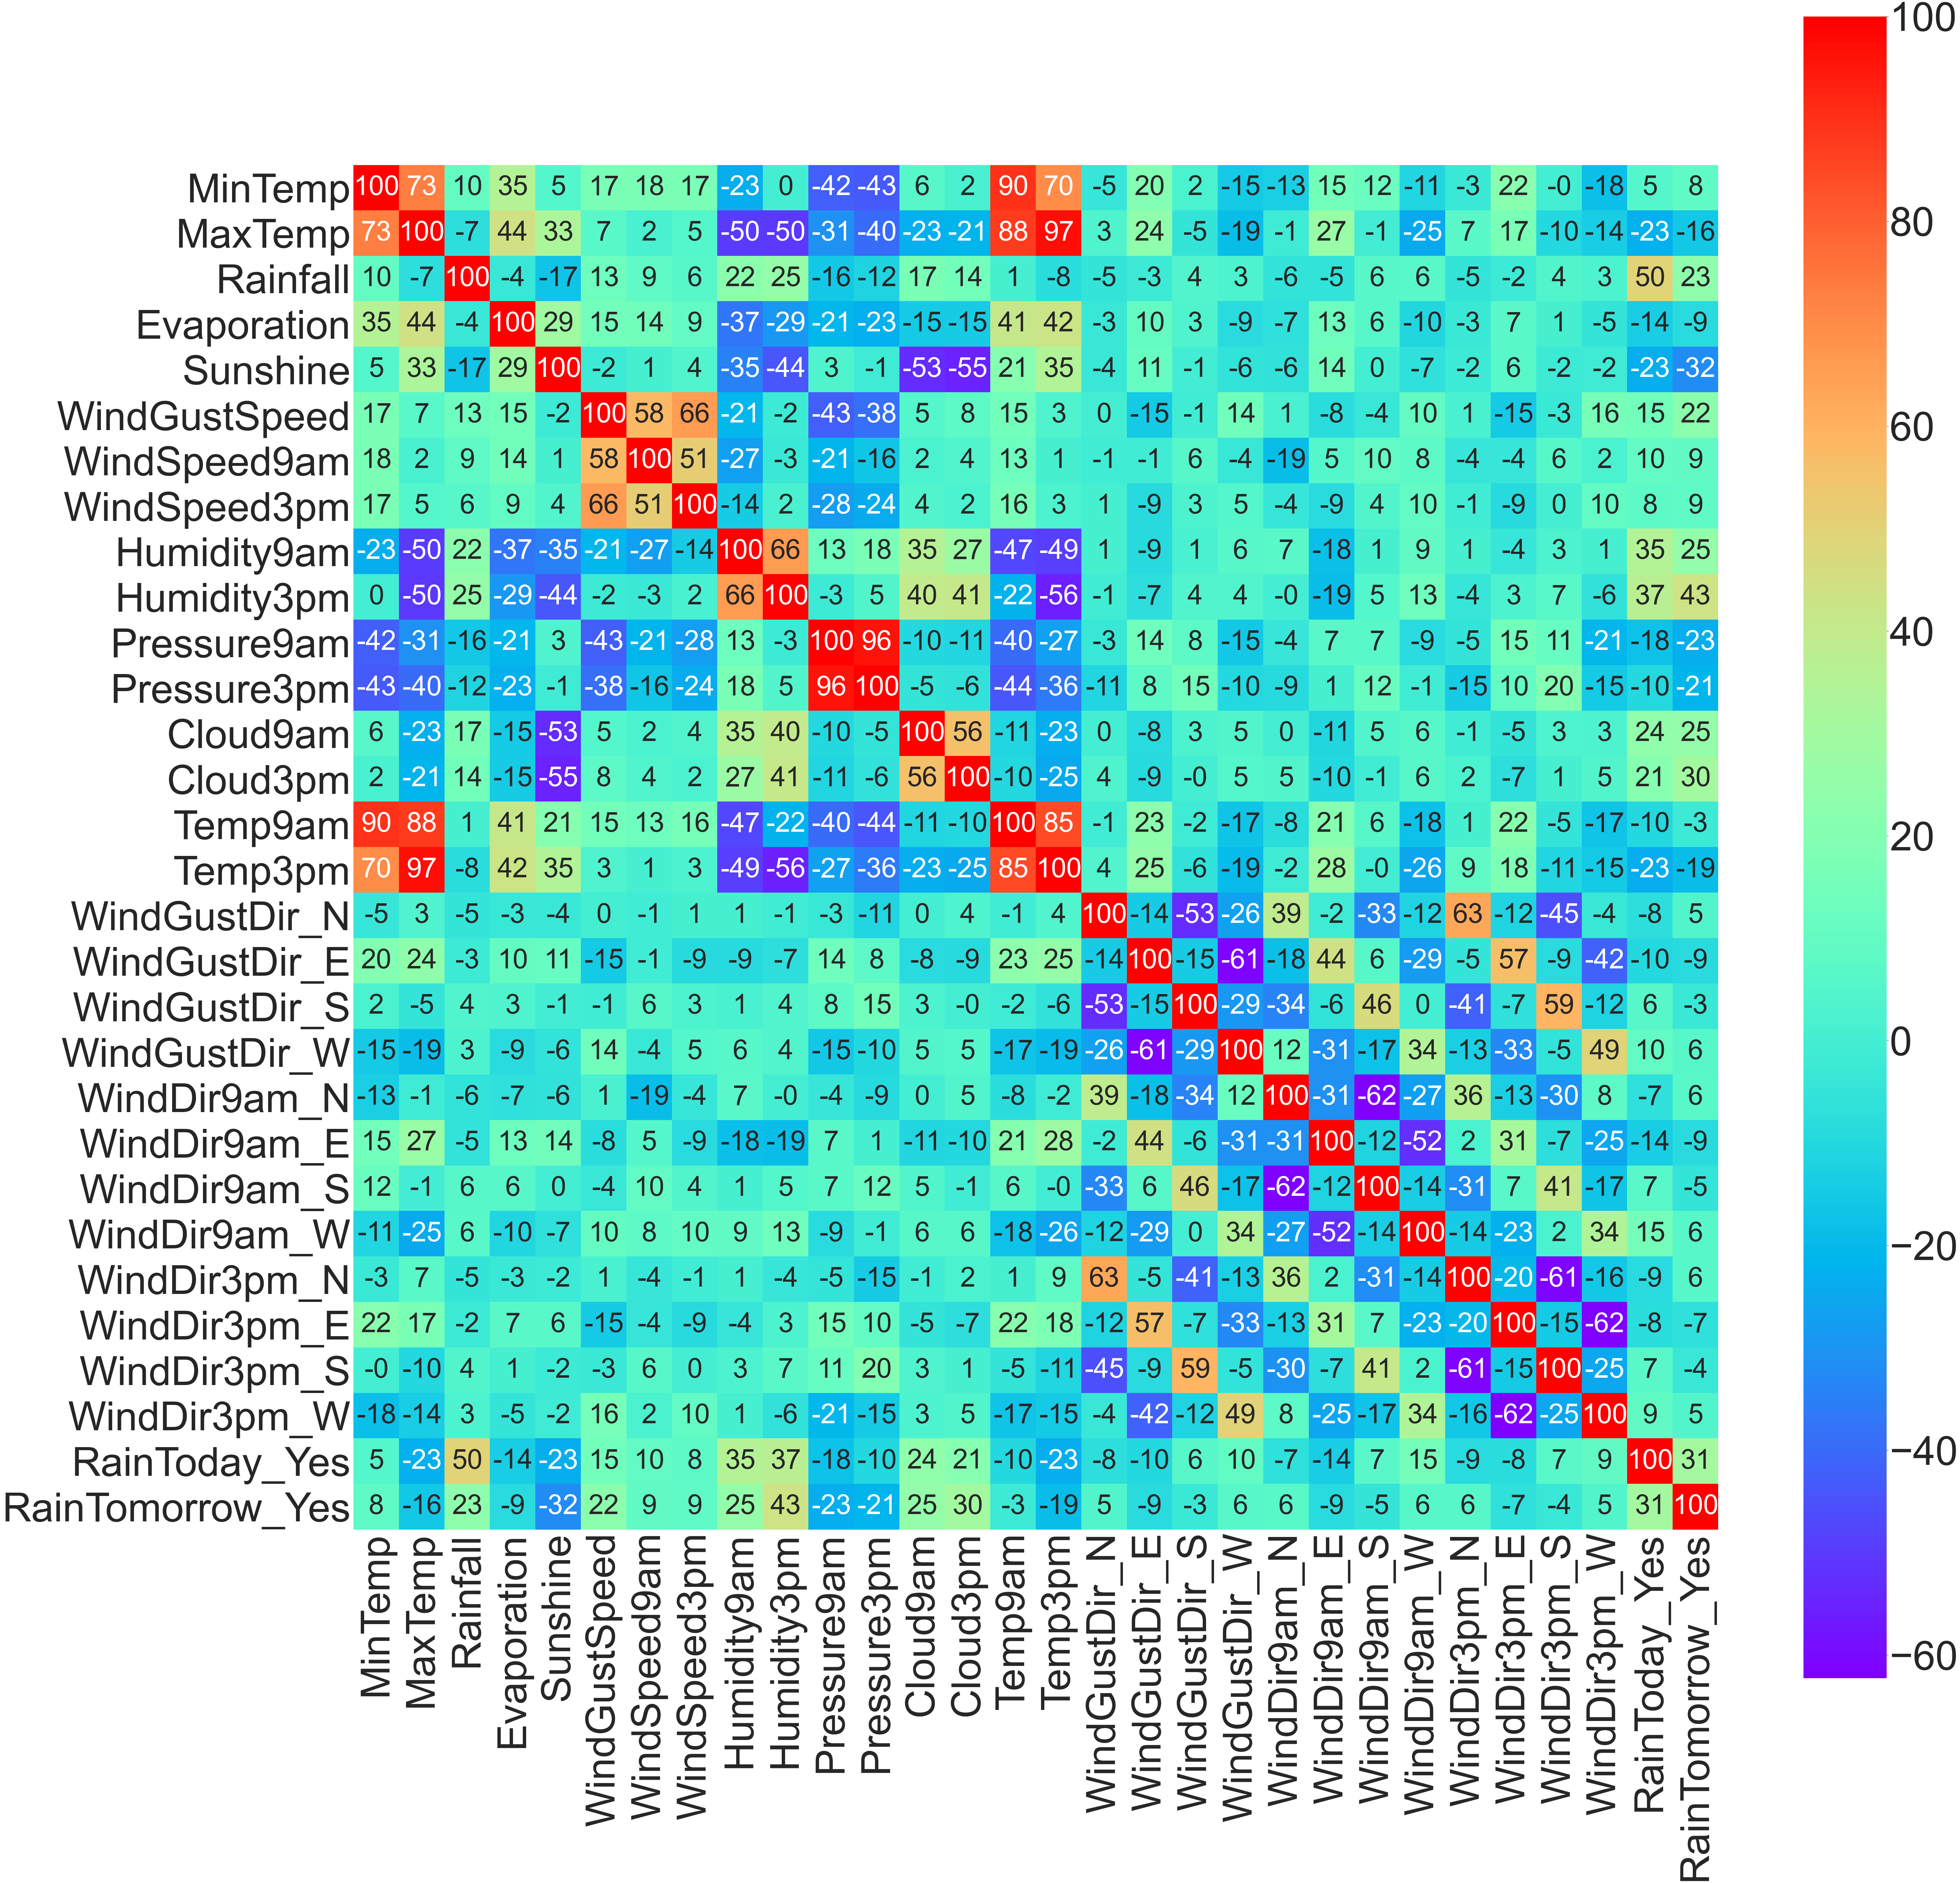

In [33]:
# Creates a correlation heatmap
def visualize_correlation(data):
    #Set Correlation dataframe as df.corr * 100 (visualize percentage)
    corr = data.corr()*100

    #Correlation Matrix
    sns.set(font_scale=12)
    fig, ax = plt.subplots(figsize=(100,100)) 
    ax = sns.heatmap(corr, annot=True,fmt='.0f',annot_kws={"size": 90}, cmap = 'rainbow',square=True)
    # plt.savefig('correlation.png')

visualize_correlation(data)